In [1]:
import sys
sys.path.append("/global/homes/a/arosado/photometry/")

In [1]:

bricks = 2
memory = 16
cores_per_node = 64
nodes = 64

print(f"Nodes needed for {bricks} tasks and {memory}Gb of memory per task: {int(bricks*memory/cores_per_node)} Nodes")

Nodes needed for 2 tasks and 16Gb of memory per task: 0 Nodes


In [3]:
import os
import logging
import numpy as np
import fitsio as ft
from astropy.table import Table, vstack
from matplotlib import pyplot as plt

from photometry import TargetSelection, utils, setup_logging

In [4]:
# to concatenate matched inputs 00 to 13 for north
#run = 'south'
#merged_dir = os.path.join(os.getenv('CSCRATCH'),'legacysim','dr9','DA02',run,'file0_rs0_skip0','merged')
#nber_files = 12
#file_idx = file_idx = ["%.2d"%i for i in range(nber_files)]
#Read in the fits table you want to append 
# Use Astropy's 'vstack' function
#concat_legacysim = vstack([Table.read(os.path.join(merged_dir,f'matched_inputs_{i}.fits'), format='fits') for i in file_idx])
# Create fits file with new concatenated 
#concat_legacysim.write(os.path.join(merged_dir,'matched_inputs_concatenated.fits'), format='fits', overwrite=False)

I used `ELGzdone_full_noveto.dat.fits` while Arnaud used `ELGzdone_full.dat.fits`

In [5]:
import os
import logging
import numpy as np
import fitsio as ft
from matplotlib import pyplot as plt

from photometry import TargetSelection, utils, setup_logging

logger = logging.getLogger('DA02')
setup_logging()

plot_dir = '/global/homes/a/arosado/legacysim_runs/DA02/plots/desi_collab_meeting'
run = 'north'
region = run[0].upper()
#base_dir = '/global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/2.1'
base_dir = '/global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/2'
#data_fn = os.path.join(base_dir, 'ELG_LOPnotqso_S_clustering.dat.fits')
#data_fn = os.path.join(os.getenv('CSCRATCH'),'catalogs','DA02','2.1','ELG_LOPnotqso_S_clustering_with_properties.dat.fits')
#data_full_fn = os.path.join(base_dir, 'ELG_LOPnotqso_full.dat.fits')
#data_fn = os.path.join(base_dir, 'ELG_LOPnotqso_full_noveto.dat.fits')
#randoms_fn = os.path.join(base_dir, 'ELG_LOPnotqso_0_full_noveto.ran.fits')
data_fn = os.path.join(base_dir, 'ELGzdone_full_noveto.dat.fits')
randoms_fn = os.path.join(base_dir, 'ELGzdone_0_full_noveto.ran.fits')
#data_fn = os.path.join(os.getenv('CSCRATCH'),'catalogs','DA02','2','ELGzdone_full_noveto_zcut.dat.fits')
#randoms_fn = os.path.join(base_dir, 'ELG_LOPnotqso_S_0_clustering.ran.fits')
#randoms_fn = os.path.join(os.getenv('CSCRATCH'),'catalogs','DA02','2.1', 'ELG_LOPnotqso_S_0_clustering_TSNR2_ELG.ran.fits')
#randoms_full_fn = os.path.join(base_dir, 'ELG_LOPnotqso_0_full.ran.fits')
hp_fn = '/global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/pixweight/main/resolve/dark/pixweight-dark.fits'
#legacysim_fn = os.path.join(os.getenv('CSCRATCH'),'legacysim','dr9','DA02',run,'file0_rs0_skip0','merged','matched_input_concatenated_zcut.fits')
legacysim_fn = os.path.join(os.getenv('CSCRATCH'),'legacysim','dr9','DA02',run,'file0_rs0_skip0','merged','matched_inputs_concatenated.fits')
#legacysim_fn = os.path.join(os.getenv('CSCRATCH'),'legacysim','dr9','DA02',run,'file0_rs0_skip0','merged','old','matched_input.fits')
logger.info('Filename: {}'.format(legacysim_fn))

[ 000000.00 ]: 06-19 14:52  DA02            INFO     Filename: /global/cscratch1/sd/arosado/legacysim/dr9/DA02/north/file0_rs0_skip0/merged/matched_inputs_concatenated.fits


# Some test code
added imaging properties to `ELG_LOPnotqso_S_clustering.dat.fits` to produce `ELG_LOPnotqso_S_clustering_with_properties.dat.fits`

In [6]:
r_f = Table.read(randoms_full_fn)
r = Table.read(randoms_fn)

In [7]:
#"""
mask = np.in1d(r_f['TARGETID'],r['TARGETID'])
print(mask.sum(),mask.size)
r_f = r_f[mask]
print(r_f['TARGETID'].size)
print(r['TARGETID'][2], r_f['TARGETID'][2])
#"""

869163 1275598
869163
327857883947467785 327857883947467785


In [8]:
#"""
ind = []
for i, col in enumerate(r_f.colnames):
    if col == 'TSNR2_ELG':ind.append(i)
print(ind)
#"""
#"""
cols = r_f.colnames
keep_cols = []
for i in ind:
    keep_cols.append(cols[i])
print(keep_cols)

for i, col in enumerate(keep_cols):
    r[col] = r_f[col]
#print(r_f.colnames)
for col in (r.colnames):
    if col in r_f.colnames:
        print(col, np.array_equal(r[col], r_f[col]))
#"""
catalog_dir = os.path.join(os.getenv('CSCRATCH'),'catalogs','DA02','2.1')
r.write(os.path.join(catalog_dir,'ELG_LOPnotqso_S_0_clustering_TSNR2_ELG.ran.fits'), format='fits', overwrite=False)

[34]
['TSNR2_ELG']
TARGETID True
RA True
DEC True
NTILE True
TILES True
TSNR2_ELG True


In [9]:
#d_f = Table.read(data_full_fn)
d = Table.read(data_fn)

In [11]:
d['Z'].min()

0.8000055495967752

In [7]:
for i, col in enumerate(d_f.colnames):
    if col == 'o2c': print(i)
    if col == 'ZWARN': print(i)
    if col == 'LOCATION_ASSIGNED': print(i)
    if col == 'TSNR2_ELG': print(i)

13
47
104
108


In [8]:
#"""
mask = np.in1d(d_f['TARGETID'],d['TARGETID'])
print(mask.sum(),mask.size)
d_f = d_f[mask]
print(d_f['TARGETID'].size)
print(d['TARGETID'][2], d_f['TARGETID'][2])
#"""

117572 976810
117572
39627782694637997 39627782694637997


In [9]:
#"""
cols = d_f.colnames
keep_cols = []
for i in ([i for i in range(63,91)]+[13,47,104,108]):
    keep_cols.append(cols[i])
print(keep_cols)
#"""

['EBV', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_Z', 'MW_TRANSMISSION_G', 'MW_TRANSMISSION_R', 'MW_TRANSMISSION_Z', 'NOBS_G', 'NOBS_R', 'NOBS_Z', 'PSFDEPTH_G', 'PSFDEPTH_R', 'PSFDEPTH_Z', 'GALDEPTH_G', 'GALDEPTH_R', 'GALDEPTH_Z', 'FLUX_W1', 'FLUX_W2', 'FLUX_IVAR_W1', 'FLUX_IVAR_W2', 'MW_TRANSMISSION_W1', 'MW_TRANSMISSION_W2', 'FIBERFLUX_G', 'FIBERFLUX_R', 'FIBERFLUX_Z', 'ZWARN', 'TSNR2_ELG', 'LOCATION_ASSIGNED', 'o2c']


In [12]:
for i, col in enumerate(keep_cols):
    d[col] = d_f[col]

In [13]:
for col in (['TARGETID','RA','DEC']+keep_cols):
    print(col, np.array_equal(d[col], d_f[col]))

TARGETID True
RA True
DEC True
EBV True
FLUX_G True
FLUX_R True
FLUX_Z True
FLUX_IVAR_G True
FLUX_IVAR_R True
FLUX_IVAR_Z True
MW_TRANSMISSION_G True
MW_TRANSMISSION_R True
MW_TRANSMISSION_Z True
NOBS_G True
NOBS_R True
NOBS_Z True
PSFDEPTH_G True
PSFDEPTH_R True
PSFDEPTH_Z True
GALDEPTH_G True
GALDEPTH_R True
GALDEPTH_Z True
FLUX_W1 True
FLUX_W2 True
FLUX_IVAR_W1 True
FLUX_IVAR_W2 True
MW_TRANSMISSION_W1 True
MW_TRANSMISSION_W2 True
FIBERFLUX_G True
FIBERFLUX_R True
FIBERFLUX_Z True
ZWARN True
TSNR2_ELG True
LOCATION_ASSIGNED True
o2c True


In [14]:
catalog_dir = os.path.join(os.getenv('CSCRATCH'),'catalogs','DA02','2.1')
d.write(os.path.join(catalog_dir,'ELG_LOPnotqso_S_clustering_with_properties.dat.fits'), format='fits', overwrite=False)

In [6]:
%%time
# below I cut matched_input_concatenated.fits to matched_input_concatenated_zcut.fits with z: 0.8<1.6
"""
run = 'south'
merged_dir = os.path.join(os.getenv('CSCRATCH'),'legacysim','dr9','DA02',run,'file0_rs0_skip0','merged')
#cuts on z:
lg = Table.read(legacysim_fn)
lg= lg[(0.8<=lg['INPUT_HSC_MIZUKI_PHOTOZ_BEST'.lower()]) & (lg['INPUT_HSC_MIZUKI_PHOTOZ_BEST'.lower()]<=1.6)]
lg.write(os.path.join(merged_dir,'matched_input_concatenated_zcut.fits'), format='fits', overwrite=False)
"""

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs


"\nrun = 'south'\nmerged_dir = os.path.join(os.getenv('CSCRATCH'),'legacysim','dr9','DA02',run,'file0_rs0_skip0','merged')\n#cuts on z:\nlg = Table.read(legacysim_fn)\nlg= lg[(0.8<=lg['INPUT_HSC_MIZUKI_PHOTOZ_BEST'.lower()]) & (lg['INPUT_HSC_MIZUKI_PHOTOZ_BEST'.lower()]<=1.6)]\nlg.write(os.path.join(merged_dir,'matched_input_concatenated_zcut.fits'), format='fits', overwrite=False)\n"

In [7]:
#%%time
"""
catalog_dir = os.path.join(os.getenv('CSCRATCH'),'catalogs','DA02','2')
#cuts on z:
d = Table.read(data_fn)
#d = d[(0.8<=d['Z']) & (d['Z']<=1.6)]
#d.write(os.path.join(catalog_dir,'ELGzdone_full_noveto_zcut.dat.fits'), format='fits', overwrite=False)
d['Z'].min(), d['Z'].max()
"""

"\ncatalog_dir = os.path.join(os.getenv('CSCRATCH'),'catalogs','DA02','2')\n#cuts on z:\nd = Table.read(data_fn)\n#d = d[(0.8<=d['Z']) & (d['Z']<=1.6)]\n#d.write(os.path.join(catalog_dir,'ELGzdone_full_noveto_zcut.dat.fits'), format='fits', overwrite=False)\nd['Z'].min(), d['Z'].max()\n"

In [11]:
#(d['Z']/d['FRACZ_TILELOCID']).min(), (d['Z']/d['FRACZ_TILELOCID']).max() 

(-0.04478506859506639, 68.11621160437727)

# Functions

In [6]:
def isELG_colors(gflux=None, rflux=None, zflux=None, w1flux=None,
                 w2flux=None, gfiberflux=None, south=True, primary=None,
                 gmarg=0., grmarg=0., rzmarg=0.):
    """
    Apply ELG selection with box enlarged by ``gmarg``, ``grmarg``, ``rzmarg``.

    SV3 selection from https://github.com/desihub/desitarget/blob/7786db0931d23ed20de7ef37a6f07a52072e11ab/py/desitarget/sv3/sv3_cuts.py#L526
    """
    if primary is None:
        primary = np.ones_like(rflux, dtype='?')
    elg = primary.copy()

    # ADM work in magnitudes instead of fluxes. NOTE THIS IS ONLY OK AS
    # ADM the snr masking in ALL OF g, r AND z ENSURES positive fluxes.
    g = 22.5 - 2.5*np.log10(gflux.clip(1e-16))
    r = 22.5 - 2.5*np.log10(rflux.clip(1e-16))
    z = 22.5 - 2.5*np.log10(zflux.clip(1e-16))
    gfib = 22.5 - 2.5*np.log10(gfiberflux.clip(1e-16))

    # ADM cuts shared by the northern and southern selections.
    elg &= g > 20 - gmarg                # bright cut.
    elg &= r - z > 0.15 - rzmarg         # blue cut.
#    elg &= r - z < 1.6 + rzmarg         # red cut.

    # ADM cuts that are unique to the north or south. Identical for sv3
    # ADM but keep the north/south formalism in case we use it later.
    if south:
        elg &= gfib < 24.1 + gmarg  # faint cut.
        elg &= g - r < 0.5*(r - z) + 0.1 + grmarg  # remove stars, low-z galaxies.
    else:
        elg &= gfib < 24. + gmarg  # faint cut.
        elg &= g - r < 0.5*(r - z) + 0.1 + grmarg  # remove stars, low-z galaxies.

    # ADM separate a low-priority and a regular sample.
    elgvlo = elg.copy()

    # ADM low-priority OII flux cut.
    elgvlo &= g - r < -1.2*(r - z) + 1.6 + grmarg
    elgvlo &= g - r >= -1.2*(r - z) + 1.3 - grmarg

    # ADM high-priority OII flux cut.
    elg &= g - r < -1.2*(r - z) + 1.3 + grmarg

    return elgvlo, elg


def mask_ts(self,key_flux='EFLUX',key_fiberflux='EFIBERFLUX',region=region,gmarg=0.,grmarg=0.,rzmarg=0.,gcut=-np.inf):
    mask = isELG_colors(gflux=self['{}_G'.format(key_flux)],rflux=self['{}_R'.format(key_flux)],
                        zflux=self['{}_Z'.format(key_flux)],gfiberflux=self['{}_G'.format(key_fiberflux)],south=region=='S',
                        gmarg=gmarg,grmarg=grmarg,rzmarg=rzmarg)
    mask = mask[0] | mask[1]
    mask &= self['{}_G'.format(key_flux)] > gcut
    """
    # I added this to impose zcuts between 0.8<1.6 & makes False anything outside the interval
    if 'Z' in self.columns:
        self.logger.info('Using Z to impose z-cut')
        mask &= (0.8<=self['Z']) & (self['Z']<=1.6)
    elif 'INPUT_HSC_MIZUKI_PHOTOZ_BEST' in self.columns:
        self.logger.info('Using INPUT_HSC_MIZUKI_PHOTOZ_BEST to impose z-cut')
        z = self['INPUT_HSC_MIZUKI_PHOTOZ_BEST']
        mask &= (0.8<=z) & (z<=1.6)
    """
    return mask

TargetSelection.mask_ts = mask_ts

# Code

In [7]:
# legacysim
legacysim = TargetSelection.load_objects(legacysim_fn, radecbox=None, tracer='ELG', region=None)
legacysim.set_upper_case()

################################ I added below ################################
print(f"Before zcut on legacysim: zmin {min(legacysim['INPUT_HSC_MIZUKI_PHOTOZ_BEST'])}, zmax {max(legacysim['INPUT_HSC_MIZUKI_PHOTOZ_BEST'])}")
#zcut = (0.8<=legacysim['INPUT_HSC_MIZUKI_PHOTOZ_BEST']) & (legacysim['INPUT_HSC_MIZUKI_PHOTOZ_BEST']<=1.6) # cut on 0.8<1.6
#legacysim = legacysim[zcut]
print(f"After zcut on legacysim: zmin {min(legacysim['INPUT_HSC_MIZUKI_PHOTOZ_BEST'])}, zmax {max(legacysim['INPUT_HSC_MIZUKI_PHOTOZ_BEST'])}")
################################ I added above ################################

#continue the same as always
legacysim['RA'] = legacysim['INPUT_RA']
legacysim['DEC'] = legacysim['INPUT_DEC']
#legacysim['MATCHED'] = legacysim['DISTANCE'] < 0.15/3600.
logger.info('Found {:d}/{:d} matches.'.format(legacysim['MATCHED'].sum(),legacysim.size))
for b in legacysim.bands:
    legacysim['INPUT_EFLUX_{}'.format(b)] = utils.mag_to_flux(legacysim['INPUT_{}'.format(b)])
legacysim['INPUT_EFIBERFLUX_G'] = utils.mag_to_flux(legacysim['INPUT_GFIBER'])
legacysim.set_estimated_flux(key='EFLUX',key_transmission='MW_TRANSMISSION',key_flux='FLUX')
legacysim['EFIBERFLUX_G'] = legacysim.estimated_flux('G',key_transmission='MW_TRANSMISSION',key_flux='FIBERFLUX')
mask_tsin = legacysim.mask_ts(key_flux='INPUT_EFLUX',key_fiberflux='INPUT_EFIBERFLUX',region=region)
#mask_tsin &= legacysim.mask_maskbit(key_nobs='NOBS',key_maskbits='MASKBITS')
mask_tsout = legacysim.mask_ts(key_flux='EFLUX',key_fiberflux='EFIBERFLUX',region=region) & legacysim['MATCHED']
#mask_tsout &= legacysim.mask_maskbit(key_nobs='NOBS',key_maskbits='MASKBITS')
logger.info('Selecting {:d} (output)/{:d} (input) injected sources.'.format(mask_tsout.sum(),mask_tsin.sum()))
legacysim_data = legacysim[mask_tsout]
legacysim_randoms = legacysim[mask_tsin]

[ 000005.03 ]: 06-19 14:52  Catalogue       INFO     Loading catalogue /global/cscratch1/sd/arosado/legacysim/dr9/DA02/north/file0_rs0_skip0/merged/matched_inputs_concatenated.fits.
[ 000049.62 ]: 06-19 14:53  TargetSelection INFO     Selecting 7502692/7502692 targets.


Before zcut on legacysim: zmin 0.0, zmax 5.619999885559082


[ 000092.47 ]: 06-19 14:54  DA02            INFO     Found 5133267/7502692 matches.


After zcut on legacysim: zmin 0.0, zmax 5.619999885559082


[ 000096.30 ]: 06-19 14:54  DA02            INFO     Selecting 284207 (output)/239081 (input) injected sources.


In [8]:
np.unique(legacysim['INPUT_BRICKNAME']).size
print(legacysim_data['INPUT_HSC_MIZUKI_PHOTOZ_BEST'].min(), legacysim_data['INPUT_HSC_MIZUKI_PHOTOZ_BEST'].max())
print(legacysim_randoms['INPUT_HSC_MIZUKI_PHOTOZ_BEST'].min(), legacysim_randoms['INPUT_HSC_MIZUKI_PHOTOZ_BEST'].max())

0.0 4.37
0.0 3.93


## plotting my data

[ 000106.20 ]: 06-19 14:54  Catalogue       INFO     Loading catalogue /global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/pixweight/main/resolve/dark/pixweight-dark.fits.
[ 000106.46 ]: 06-19 14:54  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000106.48 ]: 06-19 14:54  HealpixDensity  INFO     Inferring brickid from randoms.
[ 000106.48 ]: 06-19 14:54  HealpixDensity  INFO     Found 18170 bricks with randoms.


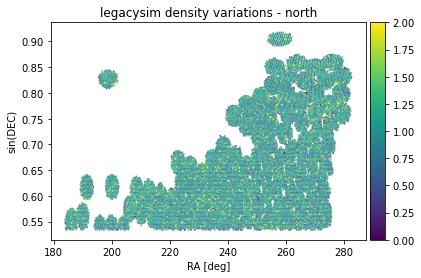

In [9]:
from photometry import Catalogue, HealpixDensity

# Density maps
map = Catalogue.load(hp_fn)
legacysim_dens = HealpixDensity(map=map)
legacysim_dens.set_randoms(randoms=legacysim_randoms)
legacysim_dens.set_properties()
legacysim_dens.set_data(data=legacysim_data)
filename = os.path.join(plot_dir,'footprint_{}.png'.format(run))
#filename = os.path.join(plot_dir,'footprint_{}_zcut.png'.format(run))
legacysim_dens.plot_density_map(title=f'legacysim density variations - {run}',vmin=0,vmax=2)

In [10]:
spectro = True

def mask_data_zok(data, dchi2=0.9, tsnrcut=80):
    mask = data['o2c'] > dchi2
    mask &= data['ZWARN']*0 == 0
    mask &= data['ZWARN'] != 999999
    mask &= data['LOCATION_ASSIGNED'] == 1
    mask &= data['TSNR2_ELG'] > tsnrcut
    return mask

def mask_randoms_zok(randoms, tsnrcut=80):
    mask = randoms['TSNR2_ELG'] > tsnrcut
    return mask

# ELG targets, TS applied already
bricknames = np.unique(legacysim['BRICKNAME'])
logger.info('Found {:d} bricknames'.format(bricknames.size))
data = TargetSelection.load_objects(data_fn,region=region) # 
################################ I added below ################################
print(f"Before zcut on data: zmin {min(data['Z'])}, zmax {max(data['Z'])}")
#zcut = (0.8<=data['Z']) & (data['Z']<=1.6) # cut on 0.8<1.6
#data = data[zcut]
print(f"After zcut on data: zmin {min(data['Z'])}, zmax {max(data['Z'])}")
################################ I added above ################################
################################ I added below ################################
#from desiutil.brick import Bricks
#data['BRICKNAME'] = Bricks().brickname(data['RA'], data['DEC'])
################################ I added above ################################

mask = np.in1d(data['BRICKNAME'],bricknames)
#mask[:] = True # do not cut data on the same bricks as legacysim
data.set_estimated_flux(key='EFLUX',key_transmission='MW_TRANSMISSION',key_flux='FLUX')
data['EFIBERFLUX_G'] = data.estimated_flux('G',key_transmission='MW_TRANSMISSION',key_flux='FIBERFLUX')
data.set_mag_from_flux(key_flux='EFLUX') # THIS LINE IS CHANGING Z FOR SOME REASON
#
print(f"zmin {min(data['Z'])}, zmax {max(data['Z'])}")
#
mask &= data.mask_ts(key_flux='EFLUX',key_fiberflux='EFIBERFLUX',region=region)
#mask &= data.mask_maskbit(key_nobs='NOBS',key_maskbits='MASKBITS')
if spectro: mask &= mask_data_zok(data)
data['WEIGHT'] = data.ones()
nreal = 128
#nassign = nreal*data['PROB_OBS'] + 1. #assignment in actual observation counts
#if spectro: data['WEIGHT'] *= (nreal+1)/nassign
if spectro: data['WEIGHT'] *= 1/data['FRACZ_TILELOCID']
################################ I added below ################################
#if spectro: data['WEIGHT'] *= data['WEIGHT_ZFAIL'] * data['WEIGHT_COMP']
################################ I added above ################################

logger.info('Selecting {:d}/{:d} targets.'.format(mask.sum(), mask.size))
data = data[mask]



randoms = TargetSelection.load_objects(randoms_fn,region=region)
from desiutil.brick import Bricks
randoms['BRICKNAME'] = Bricks().brickname(randoms['RA'], randoms['DEC'])

mask = np.in1d(randoms['BRICKNAME'],bricknames)
#mask[:] = True
#mask &= randoms.mask_maskbit(key_nobs='NOBS',key_maskbits='MASKBITS')
if spectro: mask &= mask_randoms_zok(randoms)
randoms = randoms[mask]

def from_map(cat, fields):
    import healpy as hp
    map = Catalogue.load(hp_fn)
    theta,phi = utils.radec_to_thphi(cat['RA'],cat['DEC'])
    hppix = hp.ang2pix(map.header['HPXNSIDE'],theta,phi,nest=map.header['HPXNEST'],lonlat=False)
    for field in fields: cat[field] = map[field][hppix]

[ 000108.38 ]: 06-19 14:54  DA02            INFO     Found 13882 bricknames
[ 000108.38 ]: 06-19 14:54  Catalogue       INFO     Loading catalogue /global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/2/ELGzdone_full_noveto.dat.fits.
[ 000126.71 ]: 06-19 14:54  TargetSelection INFO     Selecting 1388368/4424177 targets.


Before zcut on data: zmin nan, zmax nan
After zcut on data: zmin nan, zmax nan


<ipython-input-10-d7b1b9b11dac>:45: RuntimeWarning: divide by zero encountered in true_divide
  if spectro: data['WEIGHT'] *= 1/data['FRACZ_TILELOCID']
[ 000131.91 ]: 06-19 14:55  DA02            INFO     Selecting 80393/1388368 targets.


zmin 18.59972381591797, zmax 29.944379806518555


[ 000132.45 ]: 06-19 14:55  Catalogue       INFO     Loading catalogue /global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/2/ELGzdone_0_full_noveto.ran.fits.
[ 000138.04 ]: 06-19 14:55  TargetSelection INFO     Selecting 1423842/4471075 targets.


In [11]:
# north
b = 13964 - 83
print(b, 7502692 / (b * 0.25*0.25), 80393 / (b * 0.25*0.25),1423842 / (b * 0.25*0.25))

# south
b = 23187 # 29359 - 5500 # 23859
print(b, 12533107 / (b * 0.25*0.25), 162393 / (b * 0.25*0.25), 3047233 / (b * 0.25*0.25))

13881 8648.01325552914 92.6653699301203 1641.1981845688351
23187 8648.368137318324 112.05796351403804 2102.718247293742


In [11]:
print(f"zmin {min(data['Z'])}, zmax {max(data['Z'])}")

zmin 18.77788734436035, zmax 25.647327423095703


[ 000114.95 ]: 06-19 11:39  Catalogue       INFO     Loading catalogue /global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/pixweight/main/resolve/dark/pixweight-dark.fits.
[ 000115.50 ]: 06-19 11:39  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000115.52 ]: 06-19 11:39  HealpixDensity  INFO     Inferring brickid from randoms.
[ 000115.52 ]: 06-19 11:39  HealpixDensity  INFO     Found 18170 bricks with randoms.
[ 000115.59 ]: 06-19 11:39  Utils           INFO     Saving figure to /global/homes/a/arosado/legacysim_runs/DA02/plots/desi_collab_meeting/footprint_north.png.
[ 000116.37 ]: 06-19 11:39  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000116.49 ]: 06-19 11:39  HealpixDensity  INFO     Inferring brickid from randoms.
[ 000116.49 ]: 06-19 11:39  HealpixDensity  INFO     Found 16667 bricks with randoms.
[ 000116.50 ]: 06-19 11:39  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000116.52 ]: 06-19 11:39  HealpixDen

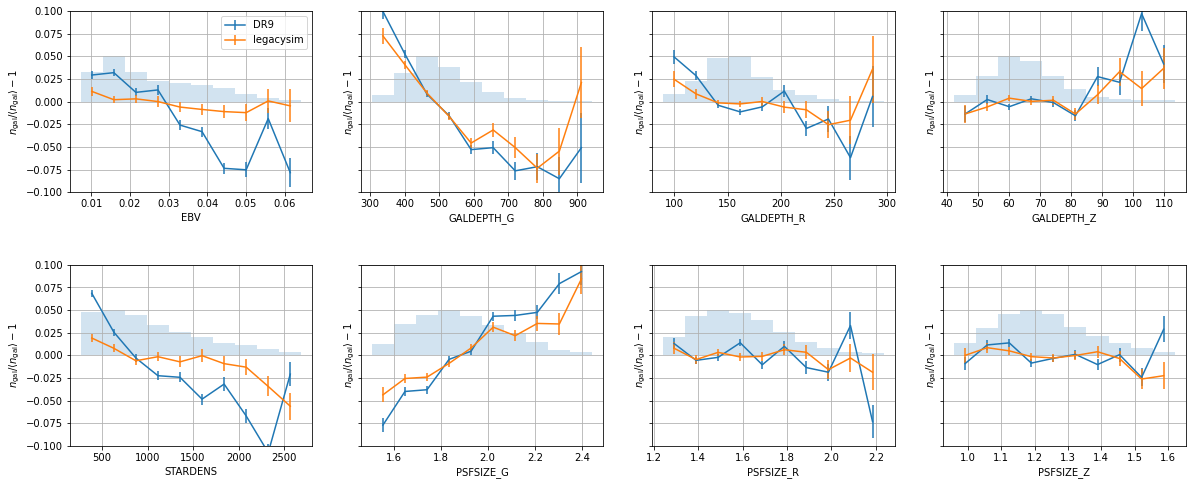

In [12]:
from photometry import Catalogue, HealpixDensity

# Density maps
map = Catalogue.load(hp_fn)
legacysim_dens = HealpixDensity(map=map)
legacysim_dens.set_randoms(randoms=legacysim_randoms)
legacysim_dens.set_properties()
legacysim_dens.set_data(data=legacysim_data)
filename = os.path.join(plot_dir,'footprint_{}.png'.format(run))
#filename = os.path.join(plot_dir,'footprint_{}_zcut'.png'.format(run))
#legacysim_dens.plot_density_map(title=f'legacysim density variations - {run}',vmin=0,vmax=2,path=filename)

props = ['EBV'] + ['GALDEPTH_{}'.format(b) for b in data.bands] + ['STARDENS'] + ['PSFSIZE_{}'.format(b) for b in data.bands]

dens = HealpixDensity(map=map)
#dens = BinnedDensity(ref=randoms,fields=['EBV'],nbins=100,ranges=[0.01,0.14])
dens.set_randoms(randoms=randoms)
dens.set_properties()
dens.set_data(data=data,key_weight='WEIGHT')

################################ I added below ################################
#filename = os.path.join(plot_dir,'footprint_{}_ELG.png'.format(run))
#filename = os.path.join(plot_dir,'footprint_{}_ELG_zcut.png'.format(run))
#dens.plot_density_map(title='ELG data density variations',vmin=0,vmax=2,path=filename)
################################ I added above ################################


legacysim_dens = HealpixDensity(map=map)
#legacysim_dens = BinnedDensity(ref=randoms,fields=['EBV'],nbins=100,ranges=[0.01,0.14])
legacysim_dens.set_randoms(randoms=legacysim_randoms)
legacysim_dens.set_properties()
legacysim_dens.set_data(data=legacysim_data)

others = [legacysim_dens]
labels = ['DR9','legacysim']

fig,lax = plt.subplots(ncols=4,nrows=2,sharex=False,sharey=True,figsize=(20,8))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
lax = lax.flatten()
for iax,prop in enumerate(props):
    dens.plot_density_variations(ax=lax[iax],others=others,prop=prop,histos=[dens],var_kwargs={'labels':labels if iax==0 else None},leg_kwargs={},ylim=(-0.1,0.1),xedges={'quantiles':[0.01,0.99]})
filename = os.path.join(plot_dir,'density_{}.png'.format(run))
#fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()

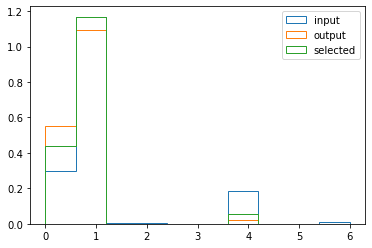

In [13]:
ax = plt.gca()
ax.hist(legacysim['INPUT_SERSIC'], histtype='step', label='input', density=True)
ax.hist(legacysim['SERSIC'], histtype='step', label='output', density=True)
ax.hist(legacysim_data['SERSIC'], histtype='step', label='selected', density=True)
#ax.hist(data['SERSIC'], histtype='step', label='in data', density=True)
ax.legend()

[ 000613.81 ]: 06-18 08:50  Catalogue       INFO     Loading catalogue /global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/pixweight/main/resolve/dark/pixweight-dark.fits.
[ 000613.88 ]: 06-18 08:50  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000614.06 ]: 06-18 08:50  HealpixDensity  INFO     Inferring brickid from randoms.
[ 000614.06 ]: 06-18 08:50  HealpixDensity  INFO     Found 21359 bricks with randoms.
[ 000614.23 ]: 06-18 08:50  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000614.70 ]: 06-18 08:50  HealpixDensity  INFO     Inferring brickid from randoms.
[ 000614.71 ]: 06-18 08:50  HealpixDensity  INFO     Found 29646 bricks with randoms.
[ 000615.18 ]: 06-18 08:50  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000615.34 ]: 06-18 08:50  HealpixDensity  INFO     Inferring brickid from randoms.
[ 000615.34 ]: 06-18 08:50  HealpixDensity  INFO     Found 19427 bricks with randoms.
[ 000615.59 ]: 06-18 08:50  

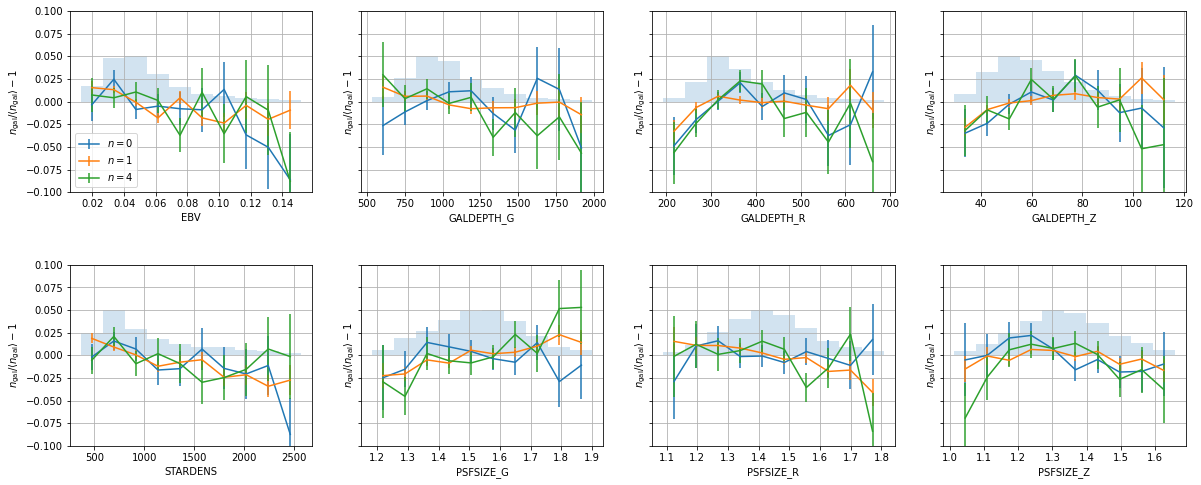

In [14]:
from photometry import Catalogue, HealpixDensity

# Density maps
map = Catalogue.load(hp_fn)

props = ['EBV'] + ['GALDEPTH_{}'.format(b) for b in data.bands] + ['STARDENS'] + ['PSFSIZE_{}'.format(b) for b in data.bands]

others = []
labels = []
for sersic in [0, 1, 4]:
    legacysim_dens = HealpixDensity(map=map)
    #legacysim_dens = BinnedDensity(ref=randoms,fields=['EBV'],nbins=100,ranges=[0.01,0.14])
    legacysim_dens.set_randoms(randoms=legacysim_randoms[legacysim_randoms['INPUT_SERSIC'] == sersic])
    legacysim_dens.set_properties()
    legacysim_dens.set_data(data=legacysim_data[legacysim_data['INPUT_SERSIC'] == sersic])
    others.append(legacysim_dens)
    labels.append('$n = {:d}$'.format(sersic))

dens, others = others[0], others[1:]

fig,lax = plt.subplots(ncols=4,nrows=2,sharex=False,sharey=True,figsize=(20,8))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
lax = lax.flatten()
for iax,prop in enumerate(props):
    dens.plot_density_variations(ax=lax[iax],others=others,prop=prop,histos=[dens],var_kwargs={'labels':labels if iax==0 else None},leg_kwargs={},ylim=(-0.1,0.1),xedges={'quantiles':[0.01,0.99]})
#filename = os.path.join(plot_dir,'density_{}.png'.format(run))
#fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()

[ 000646.57 ]: 06-18 08:51  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000646.61 ]: 06-18 08:51  HealpixDensity  INFO     Inferring brickid from randoms.
[ 000646.61 ]: 06-18 08:51  HealpixDensity  INFO     Found 26608 bricks with randoms.
[ 000646.62 ]: 06-18 08:51  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000646.65 ]: 06-18 08:51  HealpixDensity  INFO     Inferring brickid from randoms.
[ 000646.65 ]: 06-18 08:51  HealpixDensity  INFO     Found 29858 bricks with randoms.
[ 000646.68 ]: 06-18 08:51  HealpixDensity  INFO     Found in header (nside,nest) = (256,True).
[ 000647.15 ]: 06-18 08:51  HealpixDensity  INFO     Inferring brickid from randoms.
[ 000647.15 ]: 06-18 08:51  HealpixDensity  INFO     Found 29646 bricks with randoms.
[ 000647.70 ]: 06-18 08:51  Properties      INFO     Calculating EBV statistics.
[ 000647.76 ]: 06-18 08:51  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.0178.
[ 000647.76

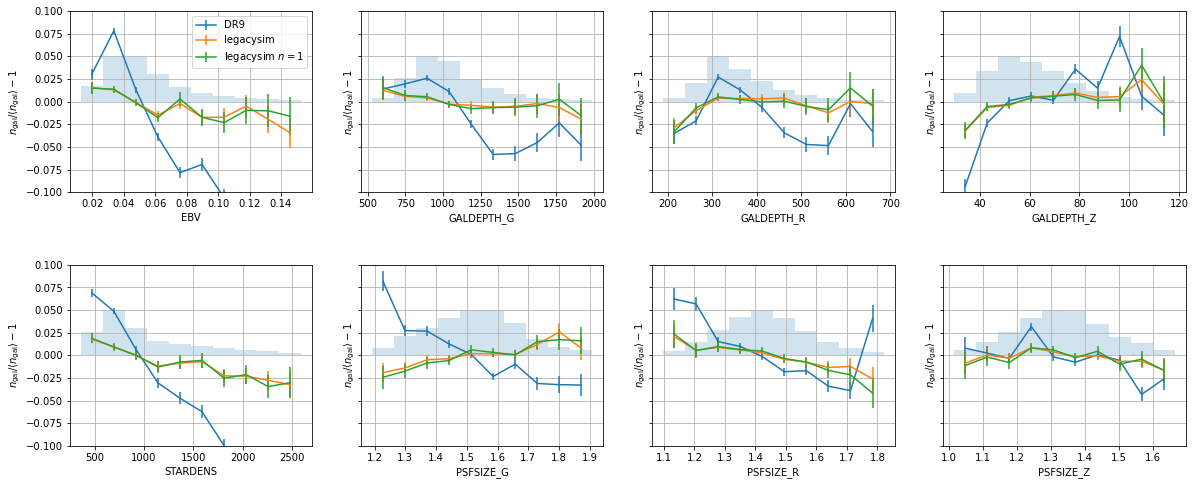

In [15]:
from photometry import Catalogue, HealpixDensity

props = ['EBV'] + ['GALDEPTH_{}'.format(b) for b in data.bands] + ['STARDENS'] + ['PSFSIZE_{}'.format(b) for b in data.bands]

dens = HealpixDensity(map=map)
#dens = BinnedDensity(ref=randoms,fields=['EBV'],nbins=100,ranges=[0.01,0.14])
dens.set_randoms(randoms=randoms)
dens.set_properties()
dens.set_data(data=data,key_weight='WEIGHT')

others = []
labels = ['DR9']

for sersic in [None, 1]:
    legacysim_dens = HealpixDensity(map=map)
    #legacysim_dens = BinnedDensity(ref=randoms,fields=['EBV'],nbins=100,ranges=[0.01,0.14])
    if sersic is not None:
        legacysim_dens.set_randoms(randoms=legacysim_randoms[legacysim_randoms['INPUT_SERSIC'] == sersic])
    else:
        legacysim_dens.set_randoms(randoms=legacysim_randoms)
    legacysim_dens.set_properties()
    if sersic is not None:
        legacysim_dens.set_data(data=legacysim_data[legacysim_data['INPUT_SERSIC'] == sersic])
    else:
        legacysim_dens.set_data(data=legacysim_data)
    others.append(legacysim_dens)
    labels.append('legacysim' if sersic is None else 'legacysim $n = {:d}$'.format(sersic))

fig,lax = plt.subplots(ncols=4,nrows=2,sharex=False,sharey=True,figsize=(20,8))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
lax = lax.flatten()
for iax,prop in enumerate(props):
    dens.plot_density_variations(ax=lax[iax],others=others,prop=prop,histos=[dens],var_kwargs={'labels':labels if iax==0 else None},leg_kwargs={},ylim=(-0.1,0.1),xedges={'quantiles':[0.01,0.99]})
filename = os.path.join(plot_dir,'density_{}.png'.format(run))
#filename = os.path.join(plot_dir,'density_{}_zcut.png'.format(run))
#fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()

In [17]:
def plot_dndz_variations(ax, z, samples, weights=None, zbins=np.linspace(0.6, 1.5, 18), linestyle='-', labels=None):

    usamples = np.unique(samples)
    nsamples = len(usamples)
    if labels is None:
        labels = [None]*nsamples
    
    dndzw = np.histogram(z, bins=zbins, weights=weights)[0]
    dndz = np.histogram(z, bins=zbins)[0]
    perr = 1./np.sqrt(dndz)*np.sqrt(nsamples)
    mid = (zbins[:-1] + zbins[1:])/2.
    ax.fill_between(mid, -perr, perr, color='gray')
    
    for isample, (sample, label) in enumerate(zip(usamples, labels)):
        mask = samples == sample
        dndzw_sample = np.histogram(z[mask], bins=zbins, weights=weights[mask] if weights is not None else None)[0]
        ratio = dndzw_sample.sum()/dndzw.sum()
        ax.plot(mid, 1./ratio*dndzw_sample/dndzw - 1., color='C{:d}'.format(isample), linestyle=linestyle, label=label)
        #if fit==True: 0
        #print(np.polynomial.polynomial.Polynomial.fit(mid,1./ratio*dndzw_sample/dndzw - 1.,deg=1))
        #fit.append(np.polynomial.polynomial.Polynomial.fit(mid,1./ratio*dndzw_sample/dndzw - 1.))
    ax.set_xlabel('redshift')
    ax.set_ylabel('relative change in n(z)')
    ax.grid(True)
    ax.set_ylim(-0.3, 0.3)

[ 001680.25 ]: 06-19 12:05  Catalogue       INFO     Loading catalogue /global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/2/ELG_LOPnotqsozdone_clustering.dat.fits.


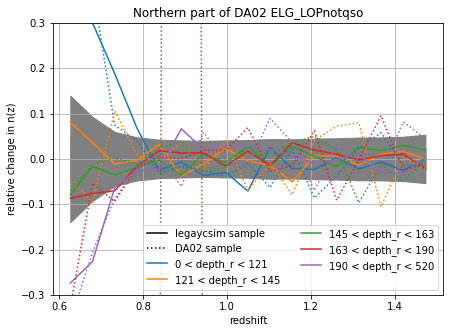

[ 001680.67 ]: 06-19 12:05  Catalogue       INFO     Loading catalogue /global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/2/ELG_LOPnotqsozdone_clustering.dat.fits.


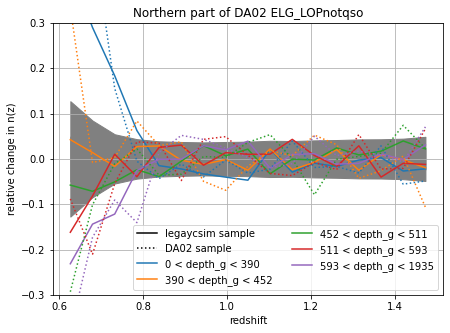

In [19]:
for prefix in ['ELG_LOPnotqso']:#,'ELG']:
    for column, name in [('GALDEPTH_R', 'depth_r'), ('GALDEPTH_G', 'depth_g'), ('EBV', 'ebv')][:-1]:
        z = legacysim_data['INPUT_HSC_MIZUKI_PHOTOZ_BEST']
        depth = legacysim_data[column]
        quantiles = np.quantile(depth, q=np.linspace(0., 1., 6))
        labels = ['{:.0f} < {} < {:.0f}'.format(low, name, high) for low, high in zip(quantiles[:-1], quantiles[1:])]
        samples = np.clip(np.digitize(depth, quantiles) - 1, 0, len(quantiles) - 1)
        ax = plt.gca()
        fig = plt.gcf()
        fig.set_size_inches(7, 5)
        ax.plot([], [], linestyle='-', color='k', label='legaycsim sample')
        ax.plot([], [], linestyle=':', color='k', label='DA02 sample')
        plot_dndz_variations(ax, z, samples, linestyle='-', labels=labels)#,zbins=np.linspace(0.8, 1.5, 18))

        data_full = data
        data_clustering = Catalogue.load(os.path.join(base_dir, '{}zdone_clustering.dat.fits'.format(prefix)))
        #data_clustering = Catalogue.load(os.path.join(base_dir, '{}_S_clustering.dat.fits'.format(prefix)))
        ind1, ind2 = utils.overlap(data_clustering['TARGETID'], data_full['TARGETID'])
        data_clustering = data_clustering[ind1]
        z = data_clustering['Z']
        weights = data_clustering['WEIGHT_COMP']
        depth = data_full[column][ind2]
        samples = np.clip(np.digitize(depth, quantiles) - 1, 0, len(quantiles) - 1)
        plot_dndz_variations(ax, z, samples, weights=weights, linestyle=':')#zbins=np.linspace(0.8, 1.5, 18))
        ax.set_title('Northern part of DA02 {}'.format(prefix))
        #ax.set_title('Southern part of DA02 {}'.format(prefix))

        ax.legend(loc=4, ncol=2)
        filename = os.path.join(plot_dir, 'dndz_{}_{}_{}.png'.format(prefix, run, name))
        #filename = os.path.join(plot_dir, 'dndz_{}_{}_{}_zcut.png'.format(prefix, run, name))
        #fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200)
        plt.show()

In [20]:
f

[]

<ipython-input-36-065632390bdf>:4: RuntimeWarning: divide by zero encountered in true_divide
  perr = 1./np.sqrt(dndz)
<ipython-input-36-065632390bdf>:4: RuntimeWarning: divide by zero encountered in true_divide
  perr = 1./np.sqrt(dndz)


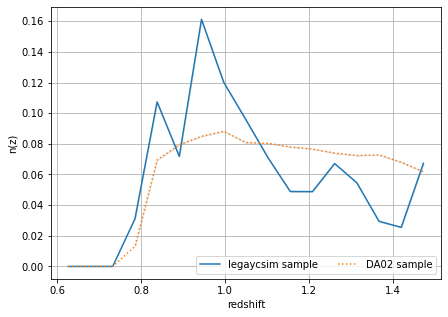

0.0


In [36]:
def plot_dndz(ax, z, weights=None, zbins=np.linspace(0.6, 1.5, 18), linestyle='-', label=None):
    dndzw = np.histogram(z, bins=zbins, weights=weights)[0]
    dndz = np.histogram(z, bins=zbins)[0]
    perr = 1./np.sqrt(dndz)
    mid = (zbins[:-1] + zbins[1:])/2.
    norm = dndzw.sum()
    dndzw, perr = dndzw/norm, perr/norm
    ax.fill_between(mid, dndzw-perr, dndzw+perr, color='gray', alpha=0.2)
    ax.plot(mid, dndzw, linestyle=linestyle, label=label)
    ax.set_xlabel('redshift')
    ax.set_ylabel('n(z)')
    ax.grid(True)

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(7, 5)
z = legacysim_data['INPUT_HSC_MIZUKI_PHOTOZ_BEST']
plot_dndz(ax, z, linestyle='-', label='legaycsim sample')
z = data_clustering['Z']
weights = data_clustering['WEIGHT_COMP']
plot_dndz(ax, z, weights=weights, linestyle=':', label='DA02 sample')
ax.legend(loc=4, ncol=2)
plt.show()
print((z<0.8).sum()*1./z.size)

# TEST CODE

In [16]:
# Step 1
import pickle
 
# Step 2
with open('my_dens_concat', 'wb') as density_variation_file:
 
  # Step 3
    pickle.dump(dens, density_variation_file)

In [17]:
# Step 1
import pickle
 
# Step 2
with open('my_dens', 'rb') as density_variation_file:
 
    # Step 3
    my_dens = pickle.load(density_variation_file)
 
    # After adematti_dens is read from file
    print(my_dens)

In [18]:
# Step 1
import pickle
 
# Step 2
with open('my_others_concat', 'wb') as others_file:
 
  # Step 3
    pickle.dump(others, others_file)

In [19]:
# Step 1
import pickle
 
# Step 2
with open('my_others_concat', 'rb') as others_file:
 
    # Step 3
    my_others = pickle.load(others_file)
 
    # After adematti_dens is read from file
    print(my_others)

[<photometry.density_variations.HealpixDensity object at 0x155524b46c70>, <photometry.density_variations.HealpixDensity object at 0x155524ab5970>]


[ 000514.28 ]: 06-05 16:30  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.0199.
[ 000514.29 ]: 06-05 16:30  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.0205.
[ 000514.29 ]: 06-05 16:30  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.0207.
[ 000514.31 ]: 06-05 16:30  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.0193.
[ 000514.32 ]: 06-05 16:30  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.0710.
[ 000514.32 ]: 06-05 16:30  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.0713.
[ 000514.34 ]: 06-05 16:30  HealpixDensity  INFO     Fraction of randoms not included in GALDEPTH_G plot: 0.0131.
[ 000514.34 ]: 06-05 16:30  HealpixDensity  INFO     Fraction of randoms not included in GALDEPTH_G plot: 0.0147.
[ 000514.35 ]: 06-05 16:30  HealpixDensity  INFO     Fraction of randoms not included in GALDEPTH_G plot: 0.0143.
[ 000514.36 ]: 0

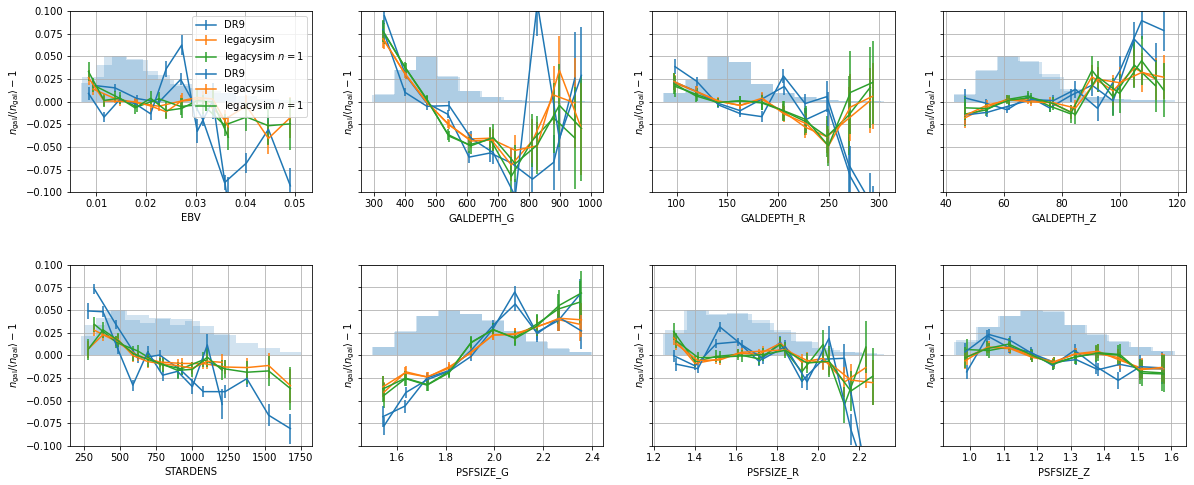

In [20]:
fig,lax = plt.subplots(ncols=4,nrows=2,sharex=False,sharey=True,figsize=(20,8))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
lax = lax.flatten()
for iax,prop in enumerate(props):
    dens.plot_density_variations(ax=lax[iax],others=others,prop=prop,histos=[dens],var_kwargs={'labels':labels if iax==0 else None},leg_kwargs={},ylim=(-0.1,0.1),xedges={'quantiles':[0.01,0.99]})
    my_dens.plot_density_variations(ax=lax[iax],others=my_others,prop=prop,histos=[dens],var_kwargs={'labels':labels if iax==0 else None},leg_kwargs={},ylim=(-0.1,0.1),xedges={'quantiles':[0.01,0.99]})
filename = os.path.join(plot_dir,'adematti_density_{}.png'.format(run))
#fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()

In [20]:
# Step 1
import pickle
 
# Step 2
with open('poperties', 'wb') as imaging_properties_file:
 
  # Step 3
    pickle.dump(props, imaging_properties_file)

In [22]:
labels

['DR9', 'legacysim', 'legacysim $n = 1$']